In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv(r"D:\Imarticus\Project\TMDb_Movie_Popularity_Analysis-main\tmdb-movies.csv")

In [3]:
df

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000e+00,0.000000e+00
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000e+00,0.000000e+00
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000e+00,0.000000e+00
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000e+00,0.000000e+00


In [4]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [5]:
df = df[df.genres.isnull()==False]

In [6]:
df = df[df.production_companies.isnull()==False]

In [7]:
df = df.drop(['id','imdb_id','original_title','homepage','tagline','keywords','overview','release_date'],axis=1)

In [8]:
df = df.drop(['cast','production_companies'],axis = 1)

{'whiskers': [<matplotlib.lines.Line2D at 0x172ec1c4c70>,
 'caps': [<matplotlib.lines.Line2D at 0x172ec1da370>,
 'boxes': [<matplotlib.lines.Line2D at 0x172ec1c49a0>],
 'medians': [<matplotlib.lines.Line2D at 0x172ec1daac0>],
 'fliers': [<matplotlib.lines.Line2D at 0x172ec1daf10>],
 'means': []}

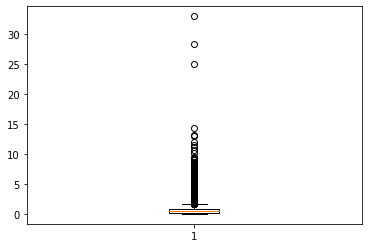

In [42]:
plt.boxplot(df.popularity)

In [10]:
con = []
for i in range(0,len(df)):
    p=df.genres.iloc[i]
    p = str(p)
    t = p.split('|')
    for j in t:
        if j in con:
            continue
        else:
            con.append(j)

In [11]:
df[con] = 0

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9827 entries, 0 to 10865
Data columns (total 31 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   popularity       9827 non-null   float64
 1   budget           9827 non-null   int64  
 2   revenue          9827 non-null   int64  
 3   director         9807 non-null   object 
 4   runtime          9827 non-null   int64  
 5   genres           9827 non-null   object 
 6   vote_count       9827 non-null   int64  
 7   vote_average     9827 non-null   float64
 8   release_year     9827 non-null   int64  
 9   budget_adj       9827 non-null   float64
 10  revenue_adj      9827 non-null   float64
 11  Action           9827 non-null   int64  
 12  Adventure        9827 non-null   int64  
 13  Science Fiction  9827 non-null   int64  
 14  Thriller         9827 non-null   int64  
 15  Fantasy          9827 non-null   int64  
 16  Crime            9827 non-null   int64  
 17  Western      

In [13]:
for i in range(0,len(df)):
    p=df.genres.iloc[i]
    p = str(p)
    t = p.split('|')
    for k in t:
        if k != '':
            df[k].iloc[i] = 1

C:\Users\kevpa\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [14]:
df

,popularity,budget,revenue,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,...,Comedy,Mystery,Romance,War,History,Music,Horror,Documentary,TV Movie,Foreign
0,32.985763,150000000,1513528810,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,...,0,0,0,0,0,0,0,0,0,0
1,28.419936,150000000,378436354,George Miller,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,...,0,0,0,0,0,0,0,0,0,0
2,13.112507,110000000,295238201,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2480,6.3,2015,1.012000e+08,...,0,0,0,0,0,0,0,0,0,0
3,11.173104,200000000,2068178225,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1.839999e+08,...,0,0,0,0,0,0,0,0,0,0
4,9.335014,190000000,1506249360,James Wan,137,Action|Crime|Thriller,2947,7.3,2015,1.747999e+08,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,0.080598,0,0,Bruce Brown,95,Documentary,11,7.4,1966,0.000000e+00,...,0,0,0,0,0,0,0,1,0,0
10862,0.065543,0,0,John Frankenheimer,176,Action|Adventure|Drama,20,5.7,1966,0.000000e+00,...,0,0,0,0,0,0,0,0,0,0
10863,0.065141,0,0,Eldar Ryazanov,94,Mystery|Comedy,11,6.5,1966,0.000000e+00,...,1,1,0,0,0,0,0,0,0,0
10864,0.064317,0,0,Woody Allen,80,Action|Comedy,22,5.4,1966,0.000000e+00,...,1,0,0,0,0,0,0,0,0,0


In [16]:
df['popularity'].index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            10856, 10857, 10858, 10859, 10860, 10861, 10862, 10863, 10864,
            10865],
           dtype='int64', length=9827)

C:\Users\kevpa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='popularity'>

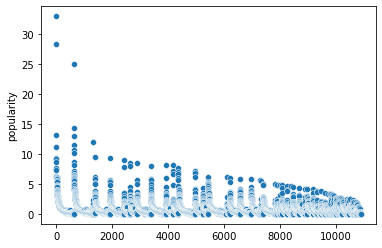

In [17]:
sns.scatterplot(df["popularity"].index,df["popularity"])

In [18]:
df["vote_count"].max()

9767

In [19]:
df.columns

Index(['popularity', 'budget', 'revenue', 'director', 'runtime', 'genres',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj', 'Action', 'Adventure', 'Science Fiction', 'Thriller',
       'Fantasy', 'Crime', 'Western', 'Drama', 'Family', 'Animation', 'Comedy',
       'Mystery', 'Romance', 'War', 'History', 'Music', 'Horror',
       'Documentary', 'TV Movie', 'Foreign'],
      dtype='object')

In [20]:
col = df.columns

In [21]:
df.iloc[0:,14]

0        1
1        1
2        1
3        0
4        1
        ..
10861    0
10862    0
10863    0
10864    0
10865    0
Name: Thriller, Length: 9827, dtype: int64

Action


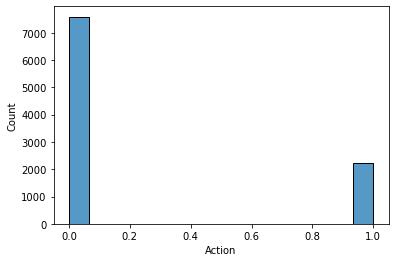

Adventure


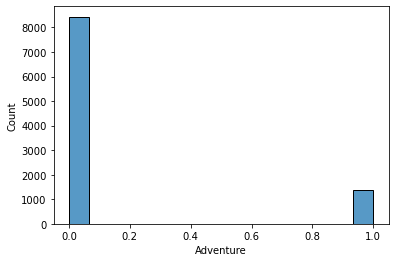

Science Fiction


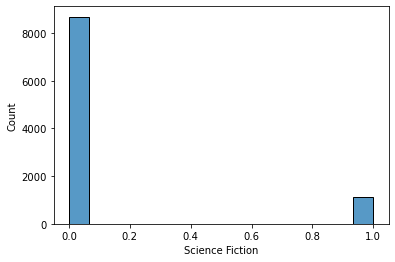

Thriller


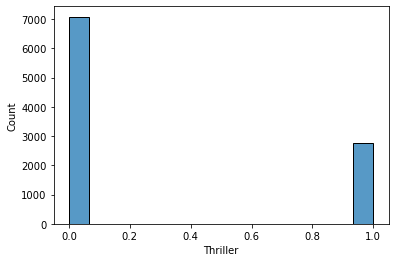

Fantasy


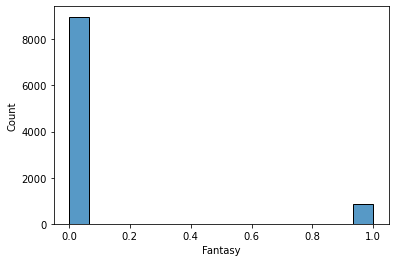

Crime


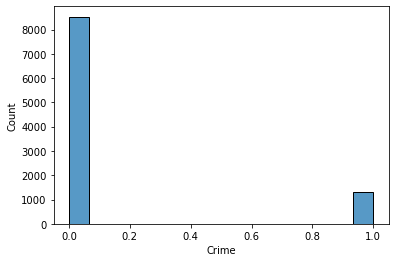

Western


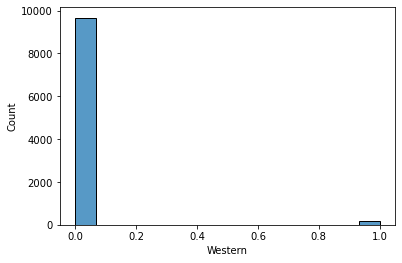

Drama


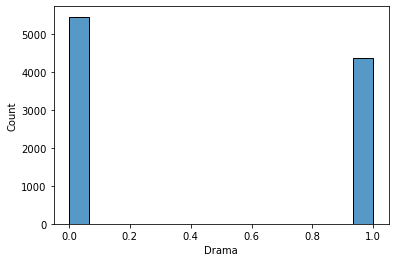

Family


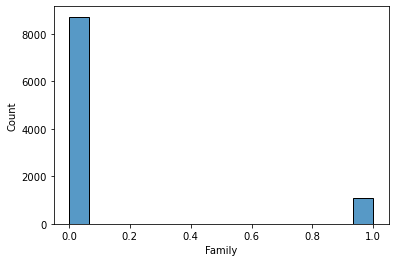

Animation


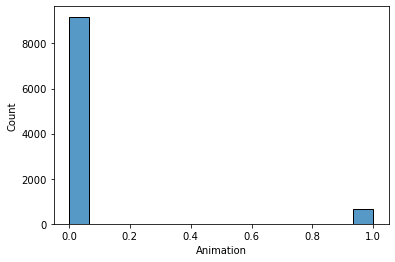

Comedy


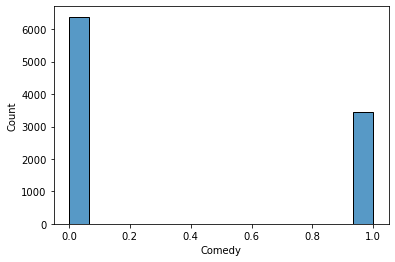

Mystery


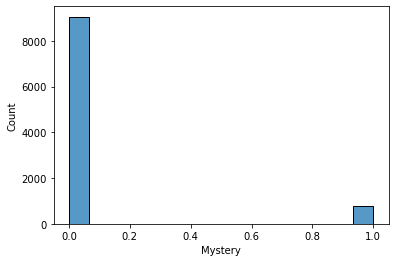

Romance


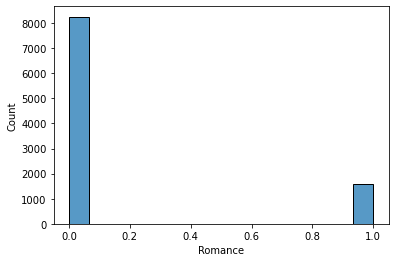

War


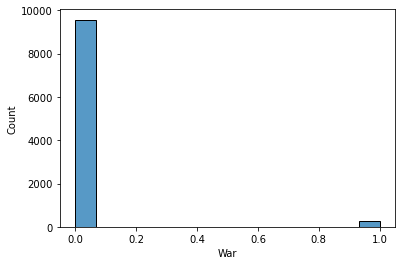

History


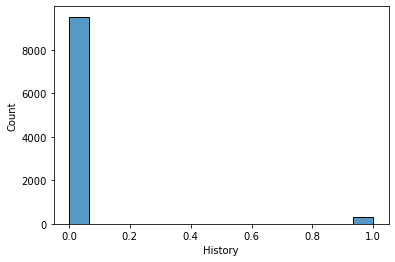

Music


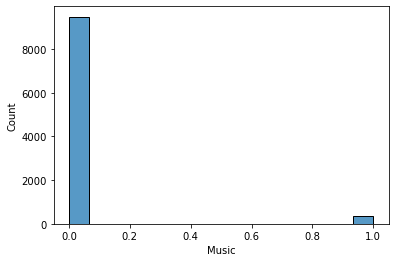

Horror


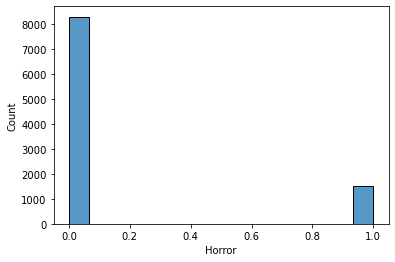

Documentary


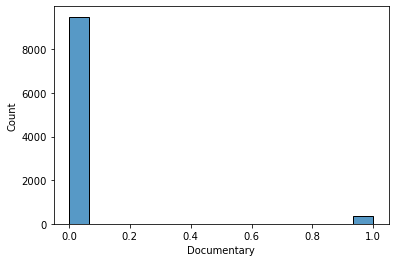

In [22]:
for i in range(11,29):
    sns.histplot(df.iloc[0:,i])
    print(col[i])
    plt.show()

In [23]:
len(df.columns)

31

In [24]:
df = df.drop(['genres'],axis = 1)

In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
df['director'] = LabelEncoder.fit_transform(df,df['director'])

C:\Users\kevpa\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:117: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self.classes_, y = _unique(y, return_inverse=True)


In [27]:
df = df.drop('release_year',axis=1)

In [28]:
from sklearn.model_selection import train_test_split, cross_val_score

X = df.drop('popularity',axis=1)
y = df['popularity']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [30]:
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor

In [31]:
linreg = LinearRegression()
linreg.fit(X_train,y_train)

LinearRegression()

In [32]:
linreg.score(X_test,y_test)

0.7348247436783566

In [33]:
xgb = XGBRegressor(n_estimators=50)
xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=50, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [34]:
xgb.score(X_test,y_test)

0.5836697781105052

In [35]:
ada = AdaBoostRegressor(random_state=0, n_estimators=100).fit(X_train,y_train)

In [36]:
ada.score(X_test,y_test)

0.6363811855675683

In [37]:
rf = RandomForestRegressor(n_estimators=1000, random_state=0)
rf.fit(X_train,y_train)

RandomForestRegressor(n_estimators=1000, random_state=0)

In [38]:
rf.score(X_test,y_test)

0.7598590839467816